In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
import datetime

In [2]:
data = pd.read_csv('flight_delays.csv', delimiter=',')
data = data.drop(['Unnamed: 0'], axis =1)

## Hypothesis 1
A disruption in operation of a certain airline can cause carrier delays over a certain amount of time
link - 
https://ir.delta.com/news-and-events/news/news-release-details/2016/Delta-Reports-Financial-and-Operating-Performance-for-August-2016/default.aspx
https://news.delta.com/deltas-flight-operations-return-normal


In [84]:
hypo1_data = data.groupby(['MONTH','CARRIER_NAME'])['CARRIER_DELAY'].mean().reset_index()

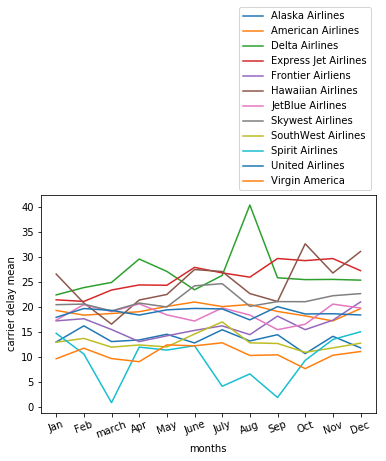

In [92]:
cols = hypo1_data.CARRIER_NAME.unique()
cols = list(cols)
months =['Jan', 'Feb', 'march','Apr','May','June', 'July','Aug','Sep', 'Oct','Nov','Dec']
for i in range(len(cols)):
    airline_month_data = hypo1_data[someD.CARRIER_NAME == cols[i]]
    plt.plot(airline_month_data.MONTH, airline_month_data.CARRIER_DELAY)
    plt.xticks(airline_month_data.MONTH, months, rotation=20)
plt.legend(cols, loc= 'lower right', bbox_to_anchor=(1, 1))
plt.xlabel('months')
plt.ylabel('carrier delay mean')
plt.show()

In [106]:
from datetime import datetime, date
import calendar
tt = data.DEP_TIME
tt = tt.iloc[0]
print(tt)

datetime.utcfromtimestamp(tt)


1041


datetime.datetime(1970, 1, 1, 0, 17, 21)

## Hypothesis 2
Which day of the week causes most of the delays or cancellation

### cancellation Description
"0","No" <br>
"1","Yes"<br>

### cancelled code 
Code,Description <br>
"A","Carrier" <br>
"B","Weather" <br>
"C","National Air System" <br>
"D","Security" <br>


In [163]:
cols = ['FL_DATE','CANCELLED', 'CANCELLATION_CODE', 'ARR_DELAY']
hyp_3data = data.loc[:,cols]

weekday - Return the day of the week as an integer, where Monday is 0 and Sunday is 6.

In [164]:
def getWeekDay(df):
    year, month, day = (int(x) for x in df['FL_DATE'].split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return answer

In [165]:
hyp_3data['DAY_NUMBER'] = hyp_3data.apply(getWeekDay,axis =1)
hyp_3data['WEEKEND'] = np.where(hyp_3data['DAY_NUMBER'].isin([5,6]), 1, 0)

In [166]:
hyp_3data_1 = hyp_3data.loc[hyp_3data.CANCELLED > 0]

In [167]:
day_cancel_data = hyp_3data_1.groupby(['DAY_NUMBER'])['CANCELLED'].sum().reset_index()
day_cancel_data

,DAY_NUMBER,CANCELLED
0,0,9716.0
1,1,7890.0
2,2,9214.0
3,3,8515.0
4,4,11656.0
5,5,9441.0
6,6,9429.0


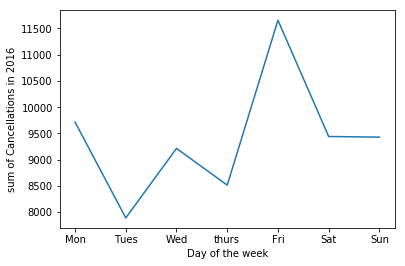

In [177]:
days = ['Mon', 'Tues','Wed','thurs','Fri','Sat','Sun']
plt.plot(day_cancel_data.DAY_NUMBER, day_cancel_data.CANCELLED)
plt.ylabel("sum of Cancellations in 2016")
plt.xlabel("Day of the week")
plt.xticks(day_cancel_data.DAY_NUMBER, days)
plt.show()

In [169]:
weekday_cancel_mean = day_cancel_data.loc[day_cancel_data.DAY_NUMBER <=4]['CANCELLED'].mean()
weekend_cancel_mean = day_cancel_data.loc[day_cancel_data.DAY_NUMBER > 4]['CANCELLED'].mean()
mean_cancel =[weekday_cancel_mean,weekend_cancel_mean ]

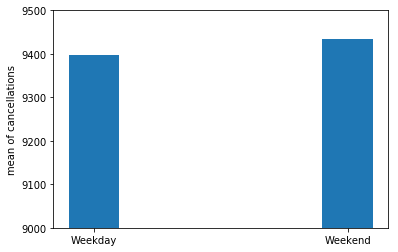

In [183]:
fig = plt.figure()
plt.bar(['Weekday', 'Weekend'], mean_cancel, width = 0.2)
plt.ylim(9000,9500)
plt.ylabel('mean of cancellations')
plt.show()

part -2

In [171]:
hyp_3data_2 = hyp_3data.loc[hyp_3data.ARR_DELAY > 0]

In [175]:
day_arrival_delay = hyp_3data_2.groupby(['DAY_NUMBER'])['ARR_DELAY'].mean().reset_index()
day_arrival_delay

,DAY_NUMBER,ARR_DELAY
0,0,62.434355
1,1,62.050163
2,2,60.422815
3,3,60.585772
4,4,62.279109
5,5,64.763017
6,6,62.774577


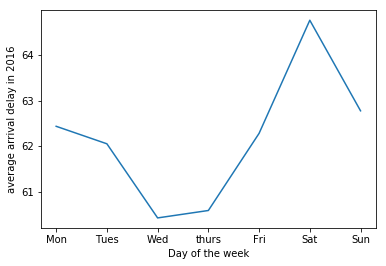

In [178]:
days = ['Mon', 'Tues','Wed','thurs','Fri','Sat','Sun']
plt.plot(day_arrival_delay.DAY_NUMBER, day_arrival_delay.ARR_DELAY)
plt.ylabel("average arrival delay in 2016")
plt.xlabel("Day of the week")
plt.xticks(day_arrival_delay.DAY_NUMBER, days)
plt.show()

In [179]:
weekday_delay_mean = day_arrival_delay.loc[day_arrival_delay.DAY_NUMBER <=4]['ARR_DELAY'].mean()
weekend_delay_mean = day_arrival_delay.loc[day_arrival_delay.DAY_NUMBER > 4]['ARR_DELAY'].mean()
mean_delay =[weekday_delay_mean,weekend_delay_mean ]

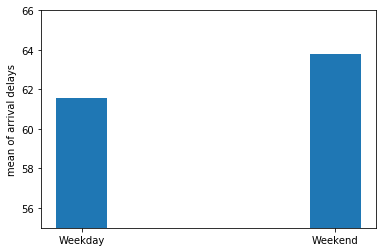

In [184]:
fig = plt.figure()
plt.bar(['Weekday', 'Weekend'], mean_delay, width = 0.2)
plt.ylim(55,66)
plt.ylabel('mean of arrival delays')
plt.show()

### Hypothesis 3
Shorter flight have longer arrival delays ?

# Lookup table for distance grp
### Code,Description
"1","Less Than 250 Miles" <br>
"2","250-499 Miles"<br>
"3","500-749 Miles"<br>
"4","750-999 Miles"<br>
"5","1000-1249 Miles"<br>
"6","1250-1499 Miles"<br>
"7","1500-1749 Miles"<br>
"8","1750-1999 Miles"<br>
"9","2000-2249 Miles"<br>
"10","2250-2499 Miles"<br>
"11","2500 Miles and Greater"<br>

In [5]:
data_3 = pd.DataFrame()
for i in range(1,13):
    data_3 = pd.concat([data_3 ,pd.read_csv('../Data/555602239_T_ONTIME-'+str(i)+'.csv', delimiter =',')],axis =0)
data_3 = data_3.drop(['Unnamed: 29'],axis =1)

In [6]:
cols = ['ORIGIN_CITY_NAME','DEST_CITY_NAME', 'DISTANCE','DISTANCE_GROUP', 'DEP_DELAY', 'ARR_DELAY']
hyp_2data = data_3.loc[:,cols]

In [7]:
distance_vs_delay = hyp_2data.groupby(['DISTANCE_GROUP'])['ARR_DELAY'].mean().reset_index()

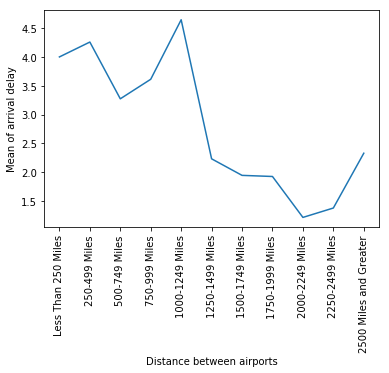

In [8]:
tic = ["Less Than 250 Miles","250-499 Miles", "500-749 Miles", "750-999 Miles", "1000-1249 Miles" ,
       "1250-1499 Miles" , "1500-1749 Miles" , "1750-1999 Miles" ,"2000-2249 Miles" , "2250-2499 Miles" ,
       "2500 Miles and Greater"]
plt.plot(distance_vs_delay.DISTANCE_GROUP,distance_vs_delay.ARR_DELAY)
plt.xlabel("Distance between airports")
plt.ylabel("Mean of arrival delay")
plt.xticks(distance_vs_delay.DISTANCE_GROUP, tic, rotation = 90)
plt.show()